***BÜYÜK RESMİ GÖRMEK ve VERİYİ TEMSİL ETMEK***

_***Keşifci Veri Analizi Nedir?***_

Betimsel istatistikler, veri görselleştirme teknikleri ve iş çıktısı hedefiyle veri üzerinde çalışmaktır.

* Veri Bilimcinin özgürce çalışabildiği, söz konusu olmayan yeni bulgulara ulaşabbileceği, yeni iş fikirleri, yeni işe yarar sonuçlar üretebileceği, sorular sorarak, hipotezler kurarak ilerlediği süreçtir

***PHYTON'DA VERİ GÖRSELLEŞTİRME***

* Matplotlib: Tüm kütüphaneler bunun üzerine dizayn edilmiştir)
* Pandas: High level API vardır; dataframe ve serilerle görselleştirme için kolaylık sağlar)
* Seaborn: High level interface sunar; istatistiksel bilgi taşıyan grafikleri daha kolay elde etmemizi sağlar)
* ggplot: R dünyasında yer alan ve phyton'a uyarlanmış bir kütüphanedir. High level bir kütüphanedir.
* Bokeh: Matplot üzerinde kurulu değildir. Interaktif bir görselleştirme kütüphanesidir. Büyük veri setleri ve akan veri setlerini yüksek performanslı olarak interaktif bir dashboard şeklinde hızlı ve kolayca sunabilir. Modern web tarayıcılar aracılığı ile gerçekleştirmeye olanak sağlar.
* Plot.ly: İnteraktif veri sunan bir kütüphanedir. 

_En çok kullanacaklarımız ***Seaborn, Matplotlib ve Pandas*** kütüphaneleri olacak_


***VERİ SETİ ve İLK ADIMLAR***

***Veri Setinin Hikayesinin ve Yapısının İncelenmesi***

In [2]:
import seaborn as sns

planets = sns.load_dataset("planets")
print(planets.head())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


***Soru-1:*** 

Veri setinin hikayesi nedir? Veri setindeki bileşenler nasıl oluşturulmuştur (Örneğin kk risk limit oranının toplam kart risklerinin açık kart limitlerine oranı gibi...)

Bu veri seti Nasanın yayınladığı Galaksi keşfi ile ilgilidir. 

* method gezegenlerin bulunma şeklini, 
* number sistemlerdeki gezegen sayısını, 
* orbital_periyod yörünge dönemini,
* mass gezegenin kütlesini,
* distance uzaklığını,
* year ise keşif tarihini ifade ediyor.

In [3]:
#İhtiyaç halinde orjinal veri setini kullanabilmek için kopyasını almak faydalı olacaktır:

df = planets.copy()

print(df.head())
print(df.tail())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
       method  number  orbital_period  mass  distance  year
1030  Transit       1        3.941507   NaN     172.0  2006
1031  Transit       1        2.615864   NaN     148.0  2007
1032  Transit       1        3.191524   NaN     174.0  2007
1033  Transit       1        4.125083   NaN     293.0  2008
1034  Transit       1        4.187757   NaN     260.0  2008


***Soru-2:***
    
Veri setinin yapısal bilgileri nedir?


 * 3 tane sayısal değişken sürekli,
 * 2 tane sayısal değişken kesikli,
 * 1 tane kategorik değişken bulunmaktadır.
    
Ayrıca veri setinde 1035 gözlem olduğunu düşünürsek, orbital_period, mass ve distance değişkenlerinde null değerler bulunmaktadır  


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
#Sadece değişken tiplerine erişmek istersek:
df.dtypes

In [23]:
#Method kategorik bir değişken (object), bazı fonksiyonlar categoric olarak algılar ancak bazıları string olarak göreceği için dönüştürme yapmak faydalı olacaktır.

import pandas as pd
df["method"] =pd.Categorical(df["method"])

In [ ]:
df.dtypes 

***Veri Setinin Betimlenmesi***

***Soru-3:***

Veri setinin betimsek istatistikleri?

In [8]:
#Soru-3: Değişken ve gözlem sayısı:

df.shape

(1035, 6)

In [9]:
# Veri setindeki eleman sayısı (satır*sütun)

df.size

6210

In [ ]:
#Sadece değişken isimleri:

df.columns

In [ ]:
#Betimsel istatistikleri : describe() methodu eksik gözlemeri göz ardı ederek sonuç döner:

df.describe().T


In [ ]:
#Kategorik değişkenleri de almak isteseydik:

df.describe(include="all")

***Eksik Değerlerin İncelenmesi***


In [ ]:
#Veri setimizde eksik gözlem var mı?

df.isna().values.any()

In [ ]:
#Hangi değişkenlerde eksik gözlem var?

df.isnull().sum()
df.isna().sum()

In [ ]:
#Hızlı biz çözüm olarak eksik veriyi nasıl doldururuz?

# 1- null değerlere 0 basılması:

df["orbital_period"].fillna(0,inplace=True)
df["mass"].fillna(0,inplace=True)
df["distance"].fillna(0,inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
# 2- null değerlere ort değer basılabilir:

df["mass"].fillna(df["mass"].mean(),inplace=True) 

In [ ]:
#Veri setinde tümm null değerlere kendi ortalamalarını atamak istersek;

df.fillna(df.mean(),inplace=True) 

In [ ]:
#Tekrar eski haline dönelim:

df = planets.copy()
df["method"] =pd.Categorical(df["method"])

print(df.head())

***KATEGORİK DEĞİŞKEN ÖZETLERİ***

    * Sadece kategorik değişkenler ve özetleri
    * Sınıf sayısının belirlenmesi
    * Sınıfların frekanslarına erişmek

In [14]:
# *Sınıf sayısının belirlenmesi

kat_df = df.select_dtypes(["category"])
    
print(kat_df.head())

            method
0  Radial Velocity
1  Radial Velocity
2  Radial Velocity
3  Radial Velocity
4  Radial Velocity


In [15]:
kat_df["method"].unique() 

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', ..., 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']

In [17]:
#Her bir kategoride kaç kayıt var?

kat_df["method"].value_counts().count()


method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: method, dtype: int64

In [19]:
# Sınıf sayısının frekanslarına erişmek

kat_df.groupby("method")["method"].count()

kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [20]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

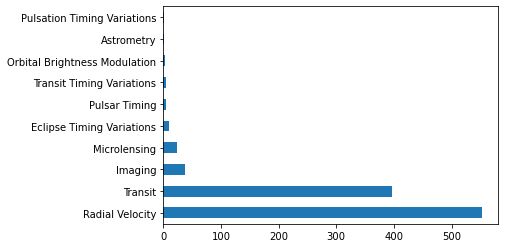

In [21]:
df["method"].value_counts().plot(kind="barh");

***SÜREKLİ DEĞİŞKEN ÖZETLERİ***

In [24]:
df = planets.copy()
df["method"] =pd.Categorical(df["method"])

In [ ]:
df.dtypes

In [25]:
num_df = df.select_dtypes(["int64","float64"])
print(num_df.head())

   number  orbital_period   mass  distance  year
0       1         269.300   7.10     77.40  2006
1       1         874.774   2.21     56.95  2008
2       1         763.000   2.60     19.84  2011
3       1         326.030  19.40    110.62  2007
4       1         516.220  10.50    119.47  2009


In [26]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [27]:
#Sadece distance değişkenine bakalım:

df["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [ ]:
# distance değişkeni için detaylı bakalım: 

print("Ortalama:", df["distance"].mean())
print("Dolu Gözlem Sayısı:", df["distance"].count())
print("Maksimum değer:", df["distance"].max())
print("Minimum değer:", df["distance"].min())
print("Medyan:", df["distance"].median())
print("Standart sapma:", df["distance"].std())

# ***GRAFİKLER***

***SÜTUN GRAFİK (BAR PLOT):*** 

Elimizdeki kategorik değişkenleri görselleştirmek ve dağılımı büyük resim üzerinden göstermek için kullanılır.  

_***Veri setinin hikayesi:***_


* price: fiyat (326 - 18,823)
* carat: ağırlık (0.2- 5.01)
* cut:kalite (Fair,good,very good,premium,ideal)
* color:renk (J:worst , D:best)
* clarity: temizlik/berraklık (I1 :worst,SI1,SI2,VS2,VS1,VVS2,VVS1,IF(best)
* x:length
* y:width
* z:depth
* depth: toplam derinlik yüzdesi =z /mean(X,Y)=2*z/(x+y)(43-79)
* table: elmasın en geniş noktasına göre genişliği (43-95)

In [445]:
import pandas as pd
import seaborn as sns

diamond= sns.load_dataset("diamonds")
print(diamond.head(20))

    carat        cut color clarity  depth  table  price     x     y     z
0    0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9    0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11   0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
12   0.22    Premium     F     SI1   6

In [31]:
df = diamond.copy()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [36]:
#Kategoric değişkenleri categoric forma çevirelim ki string değer gibi kullanılmasın: bu değişkenler ordinal olabilir, aşağıda daha detaylı inceleyeceğiz:

df["cut"] =pd.Categorical(df["cut"])
df["color"] =pd.Categorical(df["color"])
df["clarity"] =pd.Categorical(df["clarity"])

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [450]:
df.shape

(53940, 10)

In [451]:
df.size

539400

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [477]:
df.isnull().values.any()

False

In [478]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [453]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


***_Kategorik değişkenlere bakalım_***

In [41]:
#cut değişkeni için kaç farklı kategori var

print(" ""Cut"" Sınıf Sayısı:",df["cut"].value_counts().count())

#cut değişkeni için sınıf frekansları:

print(df["cut"].value_counts())

 Cut Sınıf Sayısı: 5
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


In [42]:
#clarity değişkeni için kaç farklı kategori var

print(" ""clarity"" Sınıf Sayısı:",df["clarity"].value_counts().count())

#clarity değişkeni için sınıf frekansları:

print(df["clarity"].value_counts())

 clarity Sınıf Sayısı: 8
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [43]:
#color değişkeni için kaç farklı kategori var

print(" ""color"" Sınıf Sayısı:",df["color"].value_counts().count())

#color değişkeni için sınıf frekansları:

print(df["color"].value_counts())

 color Sınıf Sayısı: 7
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


_***Kategorik değişkenlerde sıralı olma durumu var : Ordinal Data Tipine Dönüştürme***_


In [44]:
#Kategorik değişkenlerde bir sıralı olma durumu var, bunları ordinal'a çevirelim:
    #cut değişkenini sıralı bir kategorik değişkene (ordinal) dönüştür:

from pandas.api.types import CategoricalDtype
df["cut"] = df["cut"].astype(CategoricalDtype(ordered=True)) 

In [47]:
df["cut"].dtypes

CategoricalDtype(categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=True)

In [48]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [460]:
#Kategorik değişkenini aşağıdaki gibi sıraladık:

df.cut.head(5)

#Sıralama doğru mu ? Olması gereken  Fair < Good < Very Good< Premium < Ideal  

"""Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]"""

'Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]'

In [461]:
df["cut"] = df["cut"].astype(CategoricalDtype(["Fair", "Good", "Ideal", "Premium","Very Good"],ordered=True)) 

df.cut.head(5)

In [463]:
df["clarity"] = df["clarity"].astype(CategoricalDtype(["I1", "SI1", "SI2", "VS2","VS1","VVS2","VVS1","IF"],ordered=True)) 

In [49]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [50]:
df["color"] = df["color"].astype(CategoricalDtype(["J","I","H","G", "F", "E","D"],ordered=True)) 

In [51]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

_***Bar Plot'un Oluşturulması***_

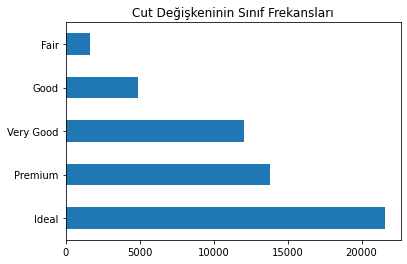

In [58]:
#Cut kategorik değişkeninin sınıflarının frekanslarını görselleştirelim:

df["cut"].value_counts().plot(kind="barh").set_title("Cut Değişkeninin Sınıf Frekansları");

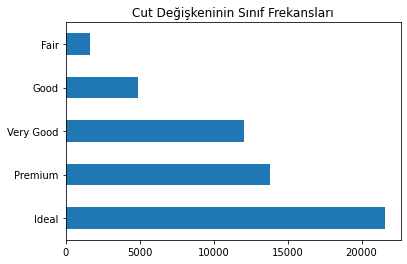

In [60]:
import matplotlib.pyplot as plt
df["cut"].value_counts().plot(kind="barh")
plt.title("Cut Değişkeninin Sınıf Frekansları");

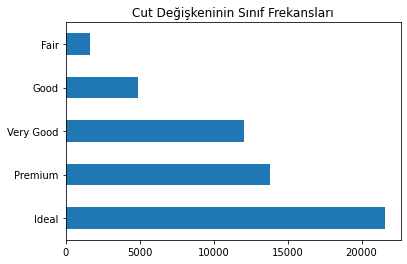

In [61]:
(df["cut"]
 .value_counts()
 .plot(kind="barh")
 .set_title("Cut Değişkeninin Sınıf Frekansları"));


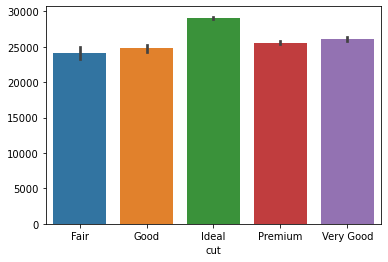

In [469]:
#Seaborn ile Bar plot:

#Cut kategorik değişkeninin sınıflarının frekanslarını görselleştirelim:

sns.barplot(x="cut", y=df["cut"].index,data=df);

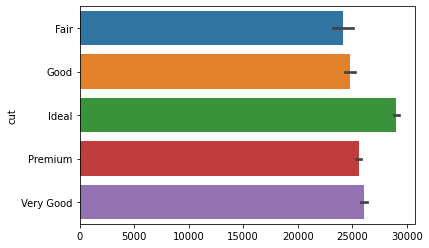

In [470]:
sns.barplot(x=df["cut"].index, y= "cut",data=df);

***Sütun Grafik Çaprazlamalar:*** Veri seti içindeki değişkenlerin birlikte ele alınmasıdır.



In [63]:
import pandas as pd
import seaborn as sns

diamonds= sns.load_dataset("diamonds")
df = diamonds.copy()

#Kategorik/ordinal düzenlemesi:
df["color"] = df["color"].astype(CategoricalDtype(["J","I","H","G", "F", "E","D"],ordered=True)) 
df["cut"] = df["cut"].astype(CategoricalDtype(["Fair", "Good", "Ideal", "Premium","Very Good"],ordered=True)) 
df["clarity"] = df["clarity"].astype(CategoricalDtype(["I1", "SI1", "SI2", "VS2","VS1","VVS2","VVS1","IF"],ordered=True)) 

In [64]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


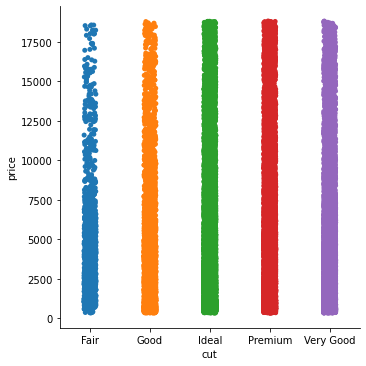

In [65]:
#cut kategorik değişkeni ile price değişkenini çaprazlayalım:

sns.catplot(x="cut",y = "price",data=df);

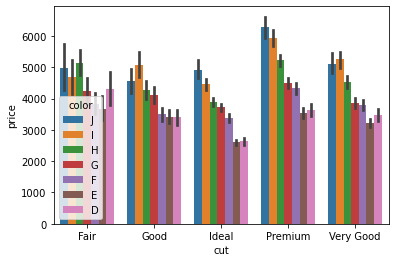

In [66]:
#Yukarıdaki grafiğe göre bir boyut daha ekleyerek daha fazla açıklanabilirlik elde ettik:
    #hue argümanı ile 3.boyut ekledik:
    
sns.barplot(x="cut",y = "price",data=df,hue="color");

***Price değişkeni  300-1800 arasındaydı yukarıdaki grafikte neden 6000 olarak kaldı?***

Görselleştirmede amaç büyük resme erişmek, fakat büyük resme erişirken veriyi temsil ediyoruz. Burada seaborn yüksek seviye bir kütüphane olduğundan biz 3.boyutu eklediğimizde bir arada göstermek için arka tarafta veriyi temsil etme değeri oluşturup,
merkezi eğilimleri temsil edecek bir kategorik değişkenler kırılımı oluşturup yansıtma yaptı.

Yani _***Y eksenindeki price***_  iki kategorik değişken bir arada bulunduğunda iki groupby işlemi sonrasında price değişkeninin ortalaması, üzerine konulan çubuklar standart sapma değerleri.

***Bunu nasıl doğrularız?***

In [69]:
df.groupby(["cut","color"])[["price"]].mean()

price
cut       color             
Fair      J      4975.655462
          I      4685.445714
          H      5135.683168
          G      4239.254777
          F      3827.003205
          E      3682.312500
          D      4291.061350
Good      J      4574.172638
          I      5078.532567
          H      4276.254986
          G      4123.482204
          F      3495.750275
          E      3423.644159
          D      3405.382175
Ideal     J      4918.186384
          I      4451.970377
          H      3889.334831
          G      3720.706388
          F      3374.939362
          E      2597.550090
          D      2629.094566
Premium   J      6294.591584
          I      5946.180672
          H      5216.706780
          G      4500.742134
          F      4324.890176
          E      3538.914420
          D      3631.292576
Very Good J      5103.513274
          I      5255.879568
          H      4535.390351
          G      3872.753806
          F      3778.820240
          E      3214.652083
          D      3470.467284

In [72]:
#Premium kategoride J rengi için fiyat 6 bin üzerinde olmalı:

df.pivot_table("price", index="color",columns="cut")

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
J,4975.655462,4574.172638,4918.186384,6294.591584,5103.513274
I,4685.445714,5078.532567,4451.970377,5946.180672,5255.879568
H,5135.683168,4276.254986,3889.334831,5216.706780,4535.390351
G,4239.254777,4123.482204,3720.706388,4500.742134,3872.753806
F,3827.003205,3495.750275,3374.939362,4324.890176,3778.820240
E,3682.312500,3423.644159,2597.550090,3538.914420,3214.652083
D,4291.061350,3405.382175,2629.094566,3631.292576,3470.467284


***_Histogram ve Yoğunluk Grafikleri_:*** 

Sayısal değişkenlerin dağılımınu ifade etmek için kullanılan grafik türleridir.

Elimizdeki sayısal değerleri belirli aralıklara bölüp, o aralıklarda gözlenme frekansını yansıtır.


In [73]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head(10)


#Kategorik/ordinal düzenlemesi:
df["color"] = df["color"].astype(CategoricalDtype(["J","I","H","G", "F", "E","D"],ordered=True)) 
df["cut"] = df["cut"].astype(CategoricalDtype(["Fair", "Good", "Ideal", "Premium","Very Good"],ordered=True)) 
df["clarity"] = df["clarity"].astype(CategoricalDtype(["I1", "SI1", "SI2", "VS2","VS1","VVS2","VVS1","IF"],ordered=True)) 

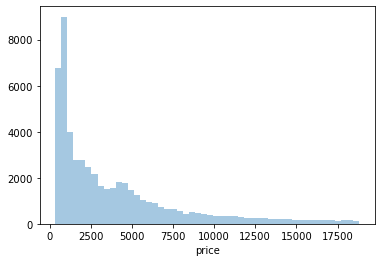

In [77]:
#kde yoğunluk fonksiyonun grafik üzerine konulup konulmaması ile ilgili bir argüman.

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.distplot(df["price"],kde=False);


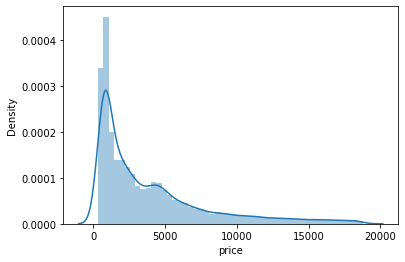

In [78]:
#yoğunluğu (kde) histogram ile birlikte gösterildiğinde y ekseninde ölçekler birbirinden farklı olacağı için seaborn otomatik olarak ölçeği 0-1 arasına
#indirgeyip yoğunluk ile histogramı birlikte gösteriyor

sns.distplot(df["price"],kde=True);

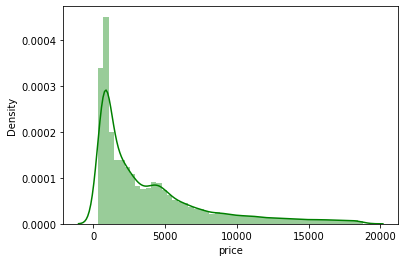

In [84]:
sns.distplot(df["price"],bins =10,color="green",kde=True);

In [79]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF

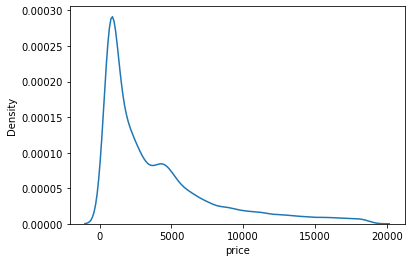

In [80]:
#Sadece yoğunluk grafiği görmek istersek histogramı kapatıp, kde argümanını aktif hale getirmeliyiz;

sns.distplot(df["price"],hist=False,kde=True);

Yukarıdaki grafiğe baktığımızda standart sapmasının çok küçük olmadığının (yayvan), medyan ile ort arasında fark olduğunun ve çarpık olduğu sonucunu çıkarabiliriz.

In [81]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

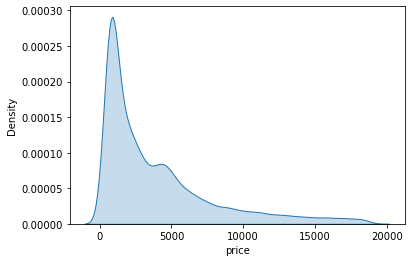

In [87]:
#Yoğunluk grafiğinin altını doldurmak istersek; shade argümanını True seçmeliyiz:

sns.kdeplot(df["price"],shade=True);

***Histogram ve Yoğunluk Çaprazlamalar:*** 

(sns
 .FacetGrid(df,
              hue = "cut",
              height =5,
              xlim = (0,10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);
    Yukarıda gördüğümüz mavi alanı oluşturan nedir? Yani bu grafiğin bize söylemediği bilgiler nelerdir? 

Hedeflediğimiz ana değişken price değişkendir; bu değişkende etki yaratan diğer değişkenleri yorumlamak kritik olandır. Yani bu yapının nasıl ortaya geldiğiniz çaprazlama ile anlayabiliriz.



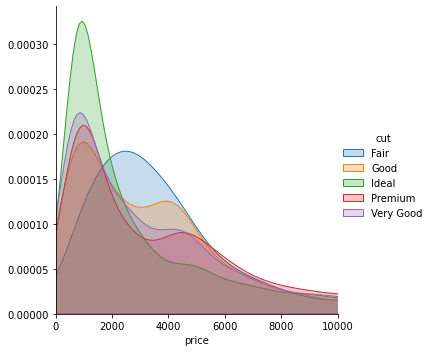

In [96]:
#Price değişkenini kullanarak bir yoğunluk grafiği (kde) oluşturacağız, fakat FacetGrid fonksiyonu ile tüm cut sınıfları ile mapleyeceğiz.
#cut kategorik değişkeni sınıflarını boyut olarak ekleyeceğiz

(sns
 .FacetGrid(df,
              hue = "cut",
              height =5,
              xlim = (0,10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);
    

Yukarıdaki grafiği değerlendirelim:

* Price'ın yükek seviyelerini kaliteli grup oluşturuyorduk (very good)
* Ancak İdeal isimli sınıf yükseklerde yer alan bir sınıf gibi gözüküyor, ancak fiyat skalasına bakarsak ideal sınıfının diğer sınıflara kıyasla 0-2000 değerleri arasında çok daha fazla yer kaplıyor. 
* Fair değişkenindeki farklılık göze çarpıyor. Ancak diğer sınıflar için 6000'den sonra benzerlik görüülüyor.

Bu durumda her bir sınıfın farklı fiyat kategorilerinde örnekleri olduğunu söyleyebiliriz.
    
    

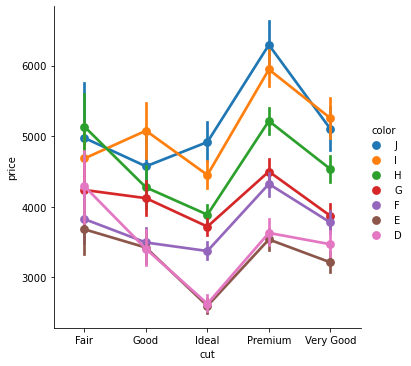

In [100]:
sns.catplot(x="cut",y = "price",hue="color",data=df,kind="point");

* ***İdeal sınıfına bakarsak;*** birden fazla renk olması ve birbirlerinden uzak olması color değişkeninin kategori sınıfları ile kesişiminde farklı bilgi taşınıyor. Ancak mor ve mavi sınıfı için çok geçerli değil, yani ideal sınıfı için bu 2 renk benzer bilgi taşıyor.

***Önemli:*** ML de amacımız bağımlı değişkende var olan bilgiyi farklı değişkenlerce açıklamaya çalışmak. Bu amacın en önemli noktası ise; price'ın içerisinde bu değişkenlerin ayırt edici bilgi taşıması. Burada ideal sınıfının altında color değişkeninin farklı sınıflarının farklı değerler oluşturması, color & cut kesiştirildiğinde price için ayırt edici bilgi taşıyor demek 

***Box Plot***

_***Veri Setinin Hikayesi***_

* total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)
* tip: bahşiş
* sex : ücreti ödeyen kişini cinsiyeti (0:male,1:female)
* smoker: grupta sigara içen var mı? (0:No,1:Yes)
* day: gün (3:Thur,4:Fri,5:Sat,6:Sun)
* time: ne zaman (0:day,1:night)
* size: grupta kaçkişi var?

In [101]:
import seaborn as sns
tips = sns.load_dataset("tips")

df = tips.copy()
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category

In [104]:
#Ordinal bir değişken bulunmadığı için sadece kategorik forma dönüştürmemiz yeterli:

import pandas as pd
df["sex"]=pd.Categorical(df["sex"])
df["smoker"]=pd.Categorical(df["smoker"])
df["day"]=pd.Categorical(df["day"])
df["time"]=pd.Categorical(df["time"])

In [ ]:
df.dtypes

In [ ]:
df.describe().T

In [109]:
#Kategoric değişkenlerimize bakalım:

print("Kategori sayısı:",df[["sex"]].value_counts().count())
print("Kategori frekansı:",df[["sex"]].value_counts())

Kategori sayısı: 2
Kategori frekansı: sex   
Male      157
Female     87
dtype: int64


In [110]:
print("Kategori sayısı:",df[["smoker"]].value_counts().count())
print("Kategori frekansı:",df[["smoker"]].value_counts())

Kategori sayısı: 2
Kategori frekansı: smoker
No        151
Yes        93
dtype: int64


In [111]:
print("Kategori sayısı:",df[["day"]].value_counts().count())
print("Kategori frekansı:",df[["day"]].value_counts())

Kategori sayısı: 4
Kategori frekansı: day 
Sat     87
Sun     76
Thur    62
Fri     19
dtype: int64


In [112]:
print("Kategori sayısı:",df[["time"]].value_counts().count())
print("Kategori frekansı:",df[["time"]].value_counts())

Kategori sayısı: 2
Kategori frekansı: time  
Dinner    176
Lunch      68
dtype: int64


***BoxPlot Grafiğin Oluşturulması:*** 

Kartiller aracılığı ile çok değerli bilgi sunan görselleştirme tekniğidir.

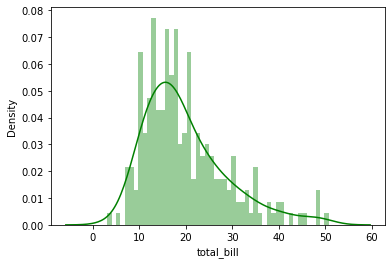

In [114]:
sns.distplot(df["total_bill"],bins =50,color="green",kde=True);

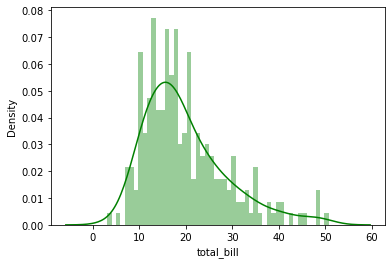

In [133]:
sns.distplot(df["total_bill"],bins =50,color="green",kde=True);

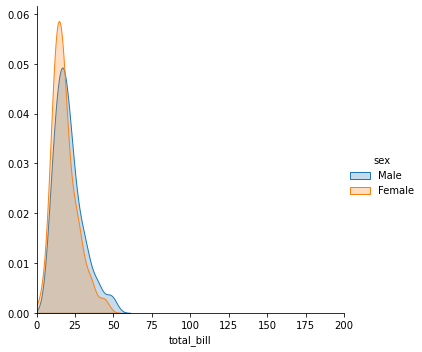

In [138]:
#Price değişkenini kullanarak bir yoğunluk grafiği (kde) oluşturacağız, fakat FacetGrid fonksiyonu ile tüm cut sınıfları ile mapleyeceğiz.
#cut kategorik değişkeni sınıflarını boyut olarak ekleyeceğiz

(sns
 .FacetGrid(df,
              hue = "sex",
              height =5,
              xlim = (0,200))
 .map(sns.kdeplot,"total_bill",shade=True)
 .add_legend()
);
    

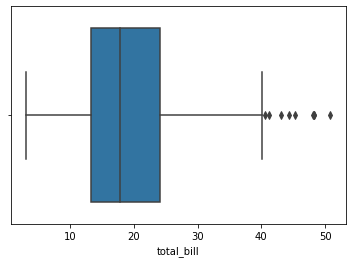

In [139]:
sns.boxplot(x="total_bill",data=df,orient="h");

* Kutu grafiğinin soldaki sınırı %25 liğine karşılık gelen değer.
* Ortadaki siyah çizgi medyan yani %50'liğine karşılık gelen değer.
* Sağ sınırı %75'liğine karşılık gelen değer.
* Dışarıda kalan değerlerde aykırı gözlemleri gösterir.

In [140]:
df["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

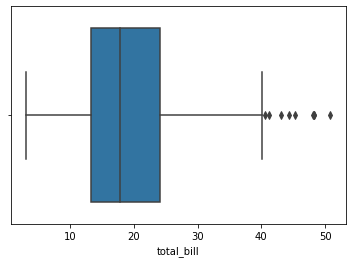

In [145]:
#Dikey
sns.boxplot(x="total_bill",data=df,orient="h");

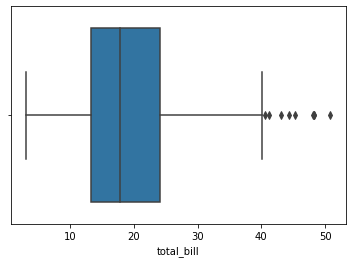

In [147]:
#Yatay

sns.boxplot(x="total_bill",data=df,orient="V");


In [ ]:
?sns.boxplot

***Kutu Grafik Çaprazlamalar***

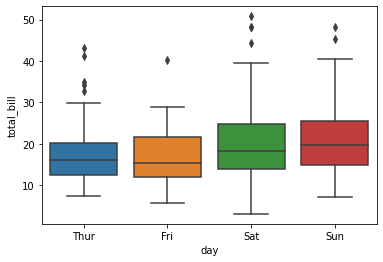

In [150]:
#Hangi günler daha fazla kazanıyoruz:

sns.boxplot(x="day",y="total_bill",data=df);

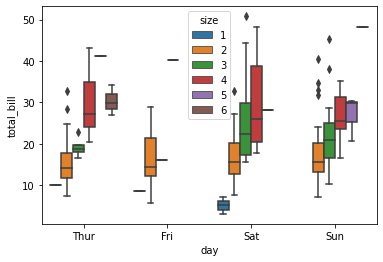

In [153]:
sns.boxplot(x="day",y="total_bill",hue="size",data=df);


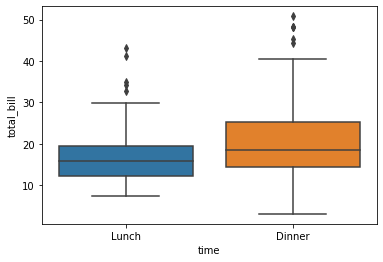

In [154]:
#Sabah mı akşammı daha çok kazanıyoruz?

sns.boxplot(x="time",y="total_bill",data=df);

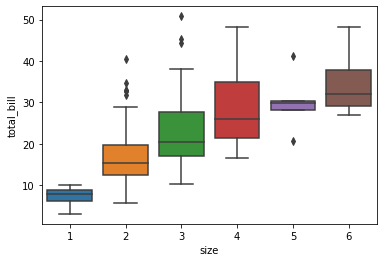

In [155]:
#Yemege gelen grup sayısı ile kazanç doğru orantılımı:

sns.boxplot(x="size",y="total_bill",data=df);


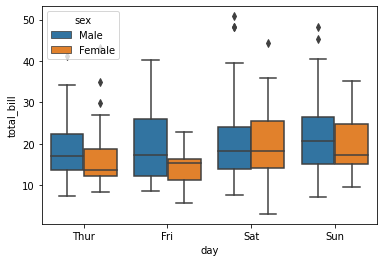

In [157]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df);

***Violin Grafiğin Oluşturulması:*** 

Boxplot'a benzer ancak dağılım anlamında da bilgi sunar; yani kutu grafiği ile yoğunluk grafiğinin kesişimi gibi düşünülebilir.

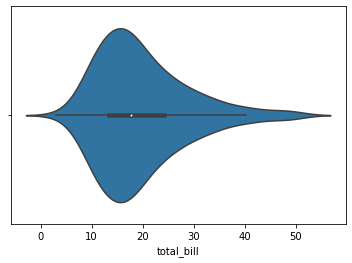

In [159]:
sns.violinplot(x= "total_bill",data=df,orient="V");

In [ ]:
sns.catplot(x= "total_bill",data=df,kind="violin",orient="v");

In [ ]:
?sns.violinplot

_***Violin Çaprazlamalar***_

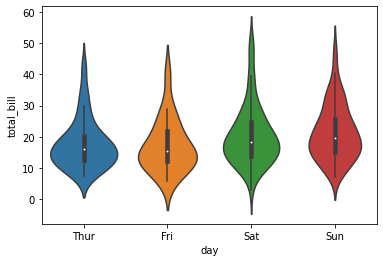

In [160]:
sns.violinplot(x="day",y="total_bill",data=df);

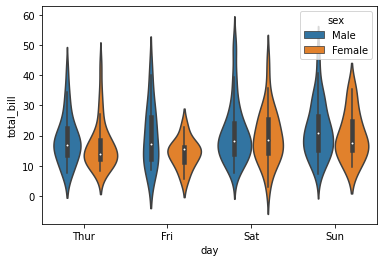

In [162]:
sns.violinplot(x="day",y="total_bill",hue="sex",data=df);

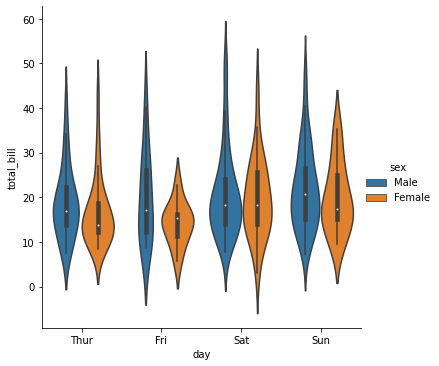

In [161]:
sns.catplot(x="day",y="total_bill",hue="sex",data=df,kind="violin");

***Korelasyon Grafiklerinin Oluşturulması:*** 

Değişkenler arasındaki ilişkiyi ifade eden bir istatistiksel terimdir.
Tek değişkenli veri görselleştirmeden iki değişkenli yapıya geçeceğiz.

En çok kullanılan yaklaşım scatter plot; scatter plot sayısal değişkenler arasındaki ililkiyi verir.


***Elimizdeki değişken kategorik ise; Bar Plot,
Sayısal ise; Histogram, Box Plot, Violin Plot ele aldık.***


_***Scatter Plot***_

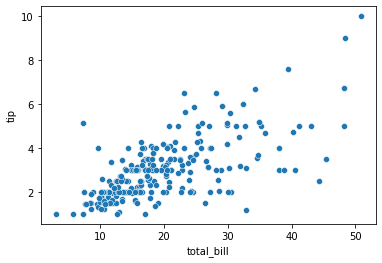

In [163]:
sns.scatterplot(x="total_bill",y="tip",data=df);

In [ ]:
?sns.scatterplot

***Sonuç:*** Yukarıdaki grafiğe göre doğrusal bir ilişki var gibi görünüyor, yani toplam hesap arttıkça bahşiş tutarının da arttığı görülmektedir.

***Kolerasyon Çaprazlamalar***


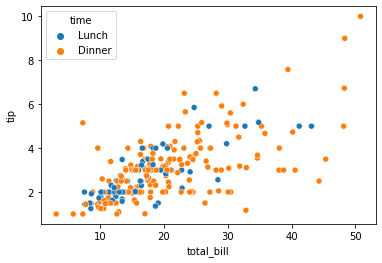

In [164]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

Yukarıdaki grafikteki gibi daha odaklı bir incelemede; ilk grafiğe ek olarak; akşam yemeklerinde total_bill ile tips'in daha doğru orantılı olduğu ancak öğle yemeklerinde bir yerden sonra daha stabil olduğu görülmektedir.

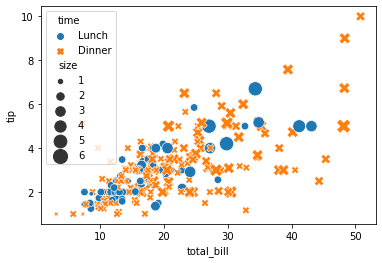

In [170]:
#marker'ları değiştirmek istersek; style argümanı ile "time" değişkeni için farklılaştırılabileceğini gösterebiliriz:

sns.scatterplot(x="total_bill",y="tip",hue="time",style="time",size="size",  sizes=(20, 200), data=df);

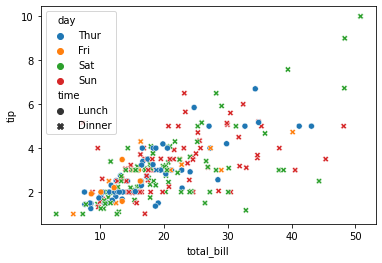

In [169]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="time",data=df);
 

In [ ]:
sns.scatterplot(x="total_bill",y="tip",hue="day",style="day",data=df);

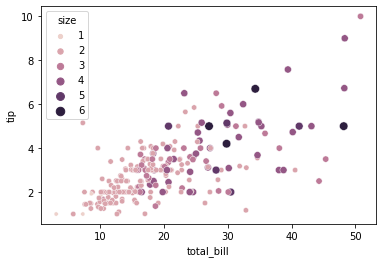

In [171]:
#buble'ların boyutlarını grup sayılarına göre düzenlersek yani sayısal bir değişkeni boyut olarak eklemek istersek "size=" kullanılır
#renklere göre de hue argümanı ile kırabiliriz.

sns.scatterplot(x="total_bill",y="tip",size="size",hue="size",data=df);

***Doğrusal İlişkinin Gösterilmesi***

In [ ]:
import matplotlib.pyplot as plt

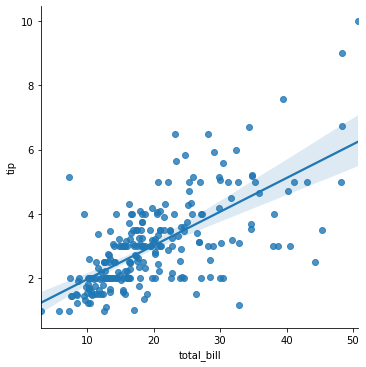

In [173]:
#lmplot: linear model'nin kısaltmasıdır:

sns.lmplot(x="total_bill",y="tip",data=df);

#Soluk açık renkli maviler sapmaları gösteriyor. total_bill 30'un üzerinde std sapma ile birlikte sapmalar artıyor.

***_Çaprazlamalar_***

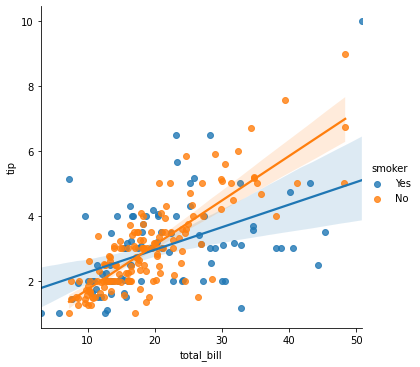

In [176]:
#Doğruların eğimi değişti; eğim yapacağımız yorumun şiddetini etkiler: Doğrumuz turuncudaki gibiyse, çok şiddetli bir şekilde
#ödenen hesap arttıkça bahşişler arttı diyebiliriz, ancak bu artışın şiddeti sigara içenler için bu kaar yüksek değildir

sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df);

Sigara içmeyenlerde bahşişin daha şiddetli bir şekilde toplam ödenen hesaptan etkilendiğini söyleyebiliriz. Sigara içenler için bu durumun şiddeti daha azdır.

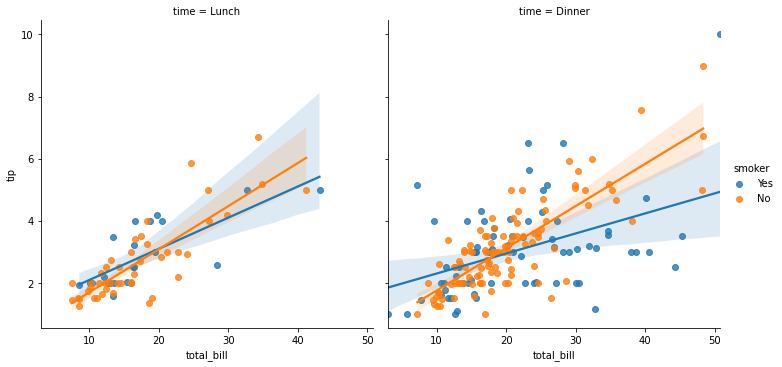

In [177]:
#Bir de time değişkenini ekleyelim

sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df);

Soldaki grafikte eğim daha çok ayrışıyor, ancak bu ayrışma anlamlı mı değil mi ilerleyen bölümlerde değineceğiz.

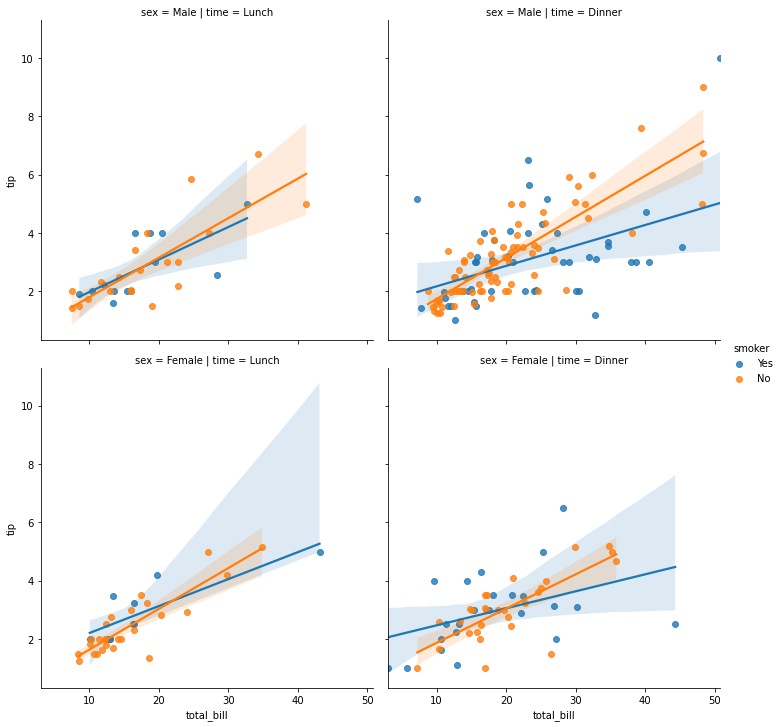

In [179]:
#Bir de cinsiyet değişkenini ekleyelim

sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);

***Scatter Plot Matrisi:*** 

Sayısal değişkenler arasındaki ilişkiyi ifade eden bir saçılım grafiğidir.

In [180]:
#Çiçek türlerin ile ilgili bilgileri kapsayan veri seti.

import seaborn as sns
iris = sns.load_dataset("iris")
df=iris.copy()
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [181]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df["species"] = pd.Categorical(df["species"])

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
#Scatter plot

sns.pairplot(df);

* Scatter plot görsellerinde eğer oluşturulan grafiğin yapısal bir formu yoksa o 2 değişken arasında ilişki olmadığı anlamına gelir.
* Scatter plot içerisinde gözlem noktaları incelendiğinde farklı köşelerde kümeleniyorsa; çaprazlama durumundan kaynaklı olan ve çaprazlama durumu ile gözlemeyebilecek olduğumuz oluşan bu yapıları ifade eden farklı alt grupların göz önünde bulundurulması gerekir. 

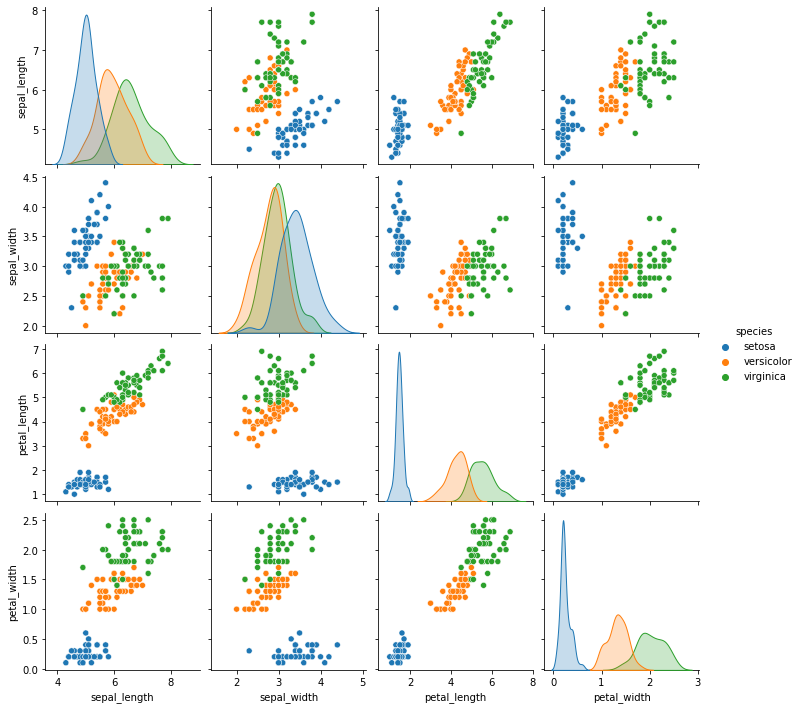

In [182]:
sns.pairplot(df,hue="species");

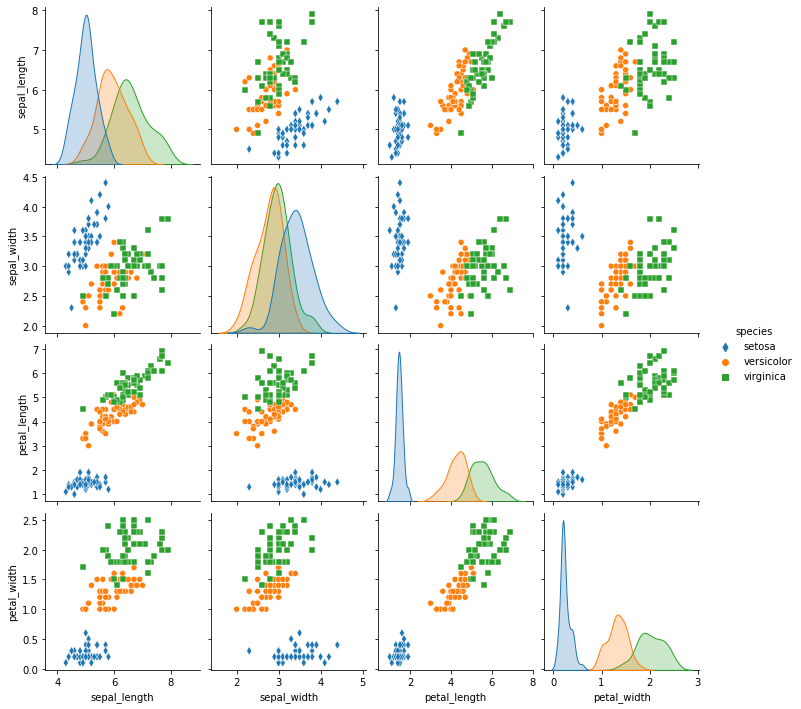

In [183]:
 #Marker'ları değiştirmek istersek;
    
sns.pairplot(df,hue="species",markers=["d","o","s"]);

In [ ]:
#Grafiğe doğru ekleyelim:

sns.pairplot(df,hue="species",markers=["d","o","s"],kind="reg");

***HEATMAP***

***_Veri Setinin Hikayesi_:*** 

Elimizdeki değişkenler arasında zaman serisi verileri yani yıl-ay gibi değişkenler olduğunda; bu dönemlere karşılık gözlemlenebilecek sayısal değişkenler olduğunda güzel bilgiler sunan grafiktir.  Sadece zamansal bağlamda değil çok sınıflı bir kategorik değişkeni bir sayısal değişken tarafından görselleştirmek istediğimizde kullanılan bir graif türüdür.

Ayrıca pattern detection problemlerinde sıklıkla tercih edilen bir yöntemdir.

In [185]:
import seaborn as sns
import pandas as pd

flights = sns.load_dataset("flights")
df=flights.copy()
df.head(10)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [189]:
df.shape

(144, 3)

In [190]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [193]:
df.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [192]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [194]:
#Heatmap bizden row data yerine daha düzenli bir yapıda veri seti bekler, bu yüzden pivot table oluşturmalıyız:

sns.heatmap(df);

ValueError: could not convert string to float: 'Jan'

In [ ]:
df1= df.pivot_table("passengers",index="month",columns="year") 

In [ ]:
df1

In [ ]:
sns.heatmap(df1);

In [ ]:
#Görselleştirme biçimlendirmeleri; hücreleri kendi değerleri ile dolduralım: fmt="d" numeric değer getirmesini söyler.
#".1f" deseydik virgülden sonra tek hane olurdu:

import matplotlib.pyplot as plt

plt.subplots(figsize=(10,6))
sns.heatmap(df1,annot=True,fmt="d"); 

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,6))
sns.heatmap(df1,annot=True,fmt="d",linewidths=0.5); 

***LİNE PLOT***

_***Veri Setinin Hikayesi:***_ Görece diğerlerine göre daha zor problemlerde kullanacağımız görselleştirme türü.
Zaman serileri, nesnelerin interneti gibi problem tiplerinde kullanabileceğimiz görselleştirme tekniği. 


***fmri veri seti***, beyine bağlı cihaz aracılığı ile toplanan verileri göstermektedir.

* subject: Verilerin toplandığı kişiler
* timepoint: Verilerin ne zaman alındığı
* Event: Birbirinden farklı olaylar
* Region: Bölgeyi ifade ediyor
* Signal: Alınan sinyali gösteriyor

In [197]:
import pandas as pd
import seaborn as sns

fmri = sns.load_dataset("fmri")
df = fmri.copy()

df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [198]:
df.event.value_counts() 

cue     532
stim    532
Name: event, dtype: int64

In [204]:
df.dtypes

subject      category
timepoint       int64
event          object
region         object
signal        float64
dtype: object

In [203]:
import pandas as pd
df["subject"] = pd.Categorical(df.subject)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [205]:
df.dtypes

subject      category
timepoint       int64
event          object
region         object
signal        float64
dtype: object

In [206]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [207]:
df[["timepoint"]].describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.0,5.479801,0.0,4.0,9.0,14.0,18.0


In [208]:
df[["signal"]].describe().T

#Kendi ölçeği içerisinde std sapma çok yüksek!


,count,mean,std,min,25%,50%,75%,max
signal,1064.0,0.00354,0.09393,-0.255486,-0.04607,-0.013653,0.024293,0.564985


Bunlardan başka subject tekil mi, her bir zaman noktasında eşit sinyal mi var gibi sorulara bakabiliriz:

In [209]:
df.groupby("timepoint")["signal"].count()

#Her bir zaman dilimi için eşit sinyal alınmış, bu durumlarda sinyallerde tekil olmalı:

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [210]:
df.groupby("signal")["signal"].count()>1

signal
-0.255486    False
-0.238474    False
-0.224351    False
-0.181241    False
-0.178510    False
             ...  
 0.455575    False
 0.460896    False
 0.476055    False
 0.494787    False
 0.564985    False
Name: signal, Length: 1064, dtype: bool

In [ ]:
df.groupby("subject")["signal"].count()

In [211]:
#Aşağıdaki gruplama için istatistiklere bakalım:

df.groupby("timepoint")["signal"].describe().T

timepoint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,-0.016662,-0.025002,-0.012873,0.034446,0.098194,0.137725,0.127515,0.075660,0.013420,-0.032041,-0.053685,-0.058194,-0.052526,-0.043532,-0.033660,-0.025880,-0.022414,-0.021368,-0.021867
std,0.028326,0.030641,0.035440,0.058260,0.092838,0.123353,0.137332,0.129704,0.104216,0.072728,0.053148,0.053828,0.056991,0.053598,0.045983,0.039092,0.035035,0.034797,0.036322
min,-0.064454,-0.082174,-0.110565,-0.089708,-0.046347,-0.017946,-0.054405,-0.108222,-0.181241,-0.152929,-0.176453,-0.238474,-0.255486,-0.224351,-0.169312,-0.134828,-0.131641,-0.121574,-0.103513
25%,-0.039169,-0.046299,-0.034944,-0.001157,0.030912,0.042762,0.022409,-0.016252,-0.049453,-0.075693,-0.078893,-0.093127,-0.090391,-0.069285,-0.055110,-0.050536,-0.041122,-0.042946,-0.046781
50%,-0.018382,-0.024533,-0.013183,0.028430,0.070166,0.096535,0.068850,0.032486,-0.012834,-0.038496,-0.052906,-0.045699,-0.042294,-0.031612,-0.022165,-0.018207,-0.020777,-0.017070,-0.020225
75%,0.003539,-0.005388,0.009318,0.061840,0.144911,0.211638,0.218919,0.144781,0.030396,0.008717,-0.015302,-0.022522,-0.016239,-0.012958,-0.006797,0.000486,-0.001380,-0.000026,-0.002821
max,0.074399,0.063558,0.077277,0.185581,0.346775,0.476055,0.564985,0.494787,0.337143,0.221716,0.089231,0.030528,0.055766,0.059510,0.050133,0.047102,0.057105,0.073757,0.090520


In [ ]:
#Standart sapmalar farklı olanlar var;demekki ortalamadan uzaklaşanlar mevcut. 
#Buna sebep olan faktörleri, farklı değişkenlerle açıklanabilirliğine bakacağız

_***Line Plot ve Çaprazlamalar***_

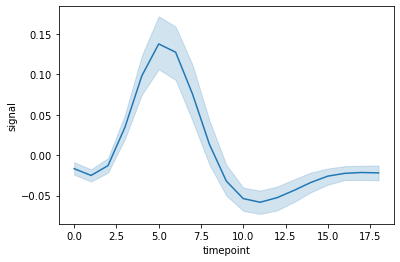

In [212]:
#Amacımız; her bir timepoint'e göre sinyali gözlemlemek:

sns.lineplot(x="timepoint",y = "signal",data=df);

In [ ]:
?sns.lineplot

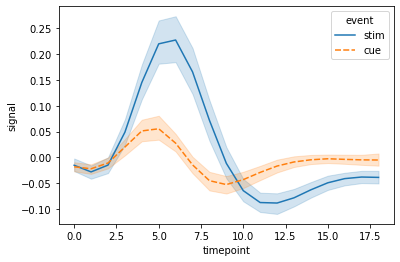

In [213]:
#event'i ekleyelim: pick noktalarına sebep olan event'in stim tipi event olduğunu görüyoruz.
    #style = event grafikleri farklılaştırır.
    
sns.lineplot(x="timepoint",y = "signal",hue="event",style ="event",data=df);

In [ ]:
#Marker ekleyelim:
sns.lineplot(x="timepoint",
             y = "signal",
             hue="event",
             style ="event",
             markers=True,
             dashes=False,
             data=df);

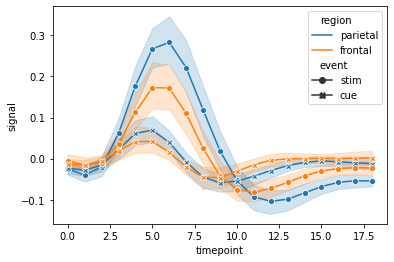

In [214]:
#Bir boyut daha ekleyelim:

sns.lineplot(x="timepoint",
             y = "signal",
             hue="region",
             style ="event",
             markers=True,
             dashes=False,
             data=df);

Yukarıdaki grafiğe göre event'in sınıfları birbirine daha yakın; ancak region'da yine üst kısımlarda konumlanmayı oluşturuyor, ancak yine farklılıklar mevcut

***BASİT ZAMAN SERİSİ GRAFİĞİ***

In [215]:
import pandas as pd
import seaborn as sns

!pip install pandas_datareader
import pandas_datareader as pr

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [216]:
df = pr.get_data_yahoo("AAPL",start ="2016-01-01",end ="2019-08-25" )

In [218]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.323219
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.713696
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.249626
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.268383
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.386133
2016-01-11,24.764999,24.334999,24.742500,24.632500,198957600.0,22.748621
2016-01-12,25.172501,24.709999,25.137501,24.990000,196616800.0,23.078775
2016-01-13,25.297501,24.325001,25.080000,24.347500,249758400.0,22.485413
2016-01-14,25.120001,23.934999,24.490000,24.879999,252680400.0,22.977186


***Veri Setinin Hikayesi:*** Apple'ın borsadaki hisse senedi değerlerinin zamana bağlı değerleri. 

* Hisse senedinin, gün içindeki, en yüksek değeri, en düşük değeri, açılış değeri, kapanış değeri, hacmi, vb bilgilerini göstermektedir


In [ ]:
df.shape

In [ ]:
df.info()

In [219]:
#Close değerini grafik üzerinde inceleyelim:

kapanis=df["Close"]


In [220]:
kapanis.head(10)

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
2016-01-11    24.632500
2016-01-12    24.990000
2016-01-13    24.347500
2016-01-14    24.879999
2016-01-15    24.282499
Name: Close, dtype: float64

In [221]:
#Nasıl ki categoric değerleri string görmemesi için nominal/ordinal değere çevirdik, date alanını da şimdi tarih tipine formatlamalıyız:

kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

In [ ]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

In [ ]:
kapanis.plot()
plt.xlabel("Tarih");
plt.ylabel("Apple Hisseleri Günlük Kapanış Değerleri");



Özetle; bu bölüm kapsamında:
    
    * Doğru veri görselleştirme tekniklerini gördük yani değişken türüne hangi grafik türü uygun.
        * Kategorik değişken için barplot ile sınıf dağılımlarına erişebiliriz
        * Sayısal değişkenler için box plot ve histogram; bu ikisinin birleşimi gibi dağılımı görmek için violin plot
        
    * Korelasyon grafikleri bölümünde elimizde 2 sayısal değişken arasındaki ilişkiyi görmek için.
    * Line plot : Daha karmaşık/mekanik veri setlerinde, nesnelerin interneti problemlerinde kullanılır
    * Zamana bağlı yapılan incelemeler için zaman serisi grafiklerini gördük

In [ ]:
df.describe()

In [ ]:
df.describe().T

In [ ]:
df.head()